<a href="https://colab.research.google.com/github/IgnacioAntonio82/APRENDIZAJE-AUTOM-TICO-1/blob/main/TP3_AA1_clasificaci%C3%B3n_Aguilar_Ignacio/TP3_AA1_clasificaci%C3%B3n_Aguilar_Ignacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Clasificación

**Nombre:Aguilar Ignacio**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluación de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

In [58]:
#Libreria


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression



from sklearn.svm import SVC




# Configuración de estilo
sns.set(style="whitegrid", palette="muted", color_codes=True)

In [59]:
## voy a trabajar con el dataSet  https://archive.ics.uci.edu/dataset/47/horse+colic

## leer el dataset

url_columnName = "https://raw.githubusercontent.com/IgnacioAntonio82/APRENDIZAJE-AUTOM-TICO-1/main/TP3_AA1_clasificación_Aguilar_Ignacio/horse-colic.names"
column_names = [
     'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
     'temperature_of_extremities', 'peripheral_pulse', 'mucous_membranes', 'capillary_refill_time',
     'pain', 'peristalsis', 'abdominal_distension', 'nasogastric_tube', 'nasogastric_reflux',
     'nasogastric_reflux_ph', 'rectal_examination_feces', 'abdomen', 'packed_cell_volume',
     'total_protein', 'abdominal_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
     'lesion_3', 'lesion_4', 'lesion_5', 'lesion_6', 'lesion_7', 'lesion_8', 'cp_data'
 ]

# Ajusta la ruta al archivo que tengas
url_train="https://raw.githubusercontent.com/IgnacioAntonio82/APRENDIZAJE-AUTOM-TICO-1/main/TP3_AA1_clasificaci%C3%B3n_Aguilar_Ignacio/horse-colic.data"
train_data = pd.read_csv(url_train,  header=None, names=column_names, delim_whitespace=True, na_values='?')



url_test="https://raw.githubusercontent.com/IgnacioAntonio82/APRENDIZAJE-AUTOM-TICO-1/main/TP3_AA1_clasificaci%C3%B3n_Aguilar_Ignacio/horse-colic.test"
test_data = pd.read_csv(url_test,  header=None, names=column_names, delim_whitespace=True, na_values='?')

# muestro el dataset entrenamiento u testeo
train_data
test_data




/tmp/ipython-input-2517609938.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv(url_train,  header=None, names=column_names, delim_whitespace=True, na_values='?')
/tmp/ipython-input-2517609938.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv(url_test,  header=None, names=column_names, delim_whitespace=True, na_values='?')


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,...,surgical_lesion,lesion_1,lesion_2,lesion_3,lesion_4,lesion_5,lesion_6,lesion_7,lesion_8,cp_data
0,2.0,1,528626,38.5,54.0,20.0,NaN,1.0,2.0,2.0,...,1.0,2,3111,0,0,1,NaN,NaN,NaN,NaN
1,2.0,1,527950,37.6,48.0,36.0,NaN,NaN,1.0,1.0,...,1.0,2,3111,0,0,1,NaN,NaN,NaN,NaN
2,1.0,1,535263,37.7,44.0,28.0,NaN,4.0,3.0,2.0,...,1.0,1,3205,0,0,2,NaN,NaN,NaN,NaN
3,1.0,1,534523,37.0,56.0,24.0,3.0,1.0,4.0,2.0,...,3.0,2,2205,2208,0,2,NaN,NaN,NaN,NaN
4,2.0,1,528926,38.0,42.0,12.0,3.0,NaN,3.0,1.0,...,1.0,2,3111,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2.0,1,529695,38.6,60.0,30.0,1.0,1.0,3.0,1.0,...,1.0,1,3205,0,0,2,NaN,NaN,NaN,NaN
64,2.0,1,528452,37.8,42.0,40.0,1.0,1.0,1.0,1.0,...,1.0,2,4124,0,0,2,NaN,NaN,NaN,NaN
65,1.0,1,534783,38.0,60.0,12.0,1.0,1.0,2.0,1.0,...,3.0,1,2209,0,0,2,NaN,NaN,NaN,NaN
66,2.0,1,528926,38.0,42.0,12.0,3.0,NaN,3.0,1.0,...,1.0,2,3111,0,0,2,NaN,NaN,NaN,NaN


## Interpretacion de columna del dataset

* El conjunto de datos Horse Colic  trata sobre casos de cólico en caballos, con la finalidad de usar los datos clínicos para predecir una variable de interés
* Tiene 300 instancias (casos de caballos) y aproximadamente 32 atributos



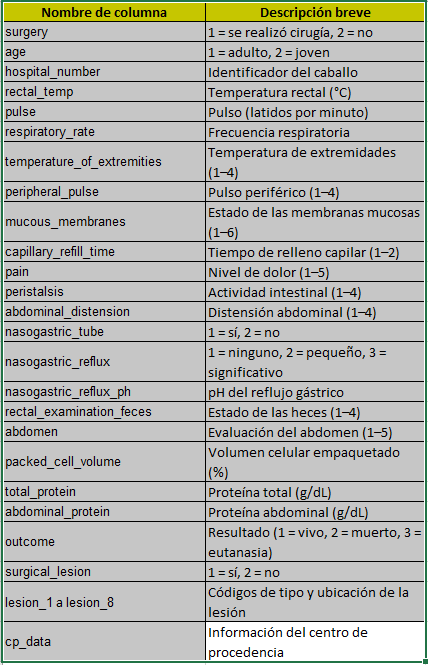


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

🧠 Análisis Exploratorio de Datos (EDA)

1️⃣ Estadísticas descriptivas

In [60]:

numerical_cols = ['rectal_temp', 'pulse', 'respiratory_rate',
                  'packed_cell_volume', 'total_protein', 'abdominal_protein', 'nasogastric_reflux_ph']

categorical_cols = [col for col in train_data.columns if col not in numerical_cols]

# Información general
print("Información general del dataset:")
print(train_data.info())

print("\nCantidad de valores faltantes por columna:")
print(train_data.isnull().sum())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(train_data[numerical_cols].describe())



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   age                         300 non-null    int64  
 2   hospital_number             300 non-null    int64  
 3   rectal_temp                 240 non-null    float64
 4   pulse                       276 non-null    float64
 5   respiratory_rate            242 non-null    float64
 6   temperature_of_extremities  244 non-null    float64
 7   peripheral_pulse            231 non-null    float64
 8   mucous_membranes            253 non-null    float64
 9   capillary_refill_time       268 non-null    float64
 10  pain                        245 non-null    float64
 11  peristalsis                 256 non-null    float64
 12  abdominal_distension        244 non-null    float64
 13  na

In [61]:
#Variables Categoricas
print("Variables Numericas:",numerical_cols)

#Variables Numericas

print("Variables Categoricas:",categorical_cols)

Variables Numericas: ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'abdominal_protein', 'nasogastric_reflux_ph']
Variables Categoricas: ['surgery', 'age', 'hospital_number', 'temperature_of_extremities', 'peripheral_pulse', 'mucous_membranes', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distension', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_examination_feces', 'abdomen', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'lesion_4', 'lesion_5', 'lesion_6', 'lesion_7', 'lesion_8', 'cp_data']


###Variables Numericas y categoricas

##**Variables numéricas**
* rectal_temp  
* pulse
* respiratory_rate
* packed_cell_volume
* total_protein
* abdominal_protein
* nasogastric_reflux_ph.

##**Variables categóricas**
* surgery (1 = cirugía, 2 = no cirugía)
* age (1 = adulto, 2 = joven)
* temperature_of_extremities (1 = normal, 2 = frío, 3 = caliente)
* peripheral_pulse (1 = normal, 2 = débil, 3 = ausente)
* pain (1 = leve, 2 = moderado, 3 = severo)
* outcome (1 = vive, 2 = muere/eutanasia)

2️⃣ Distribuciones y outliers

In [62]:
#num_cols = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'abdominal_protein', 'nasogastric_reflux_ph']

outlier_counts = {}

for col in numerical_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = train_data[(train_data[col] < lower_bound) | (train_data[col] > upper_bound)][col].count()
    outlier_counts[col] = outlier_count

# Mostrar resultados
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

rectal_temp: 14 outliers
pulse: 5 outliers
respiratory_rate: 17 outliers
packed_cell_volume: 3 outliers
total_protein: 0 outliers
abdominal_protein: 0 outliers
nasogastric_reflux_ph: 0 outliers


###Histogramas y Boxplots

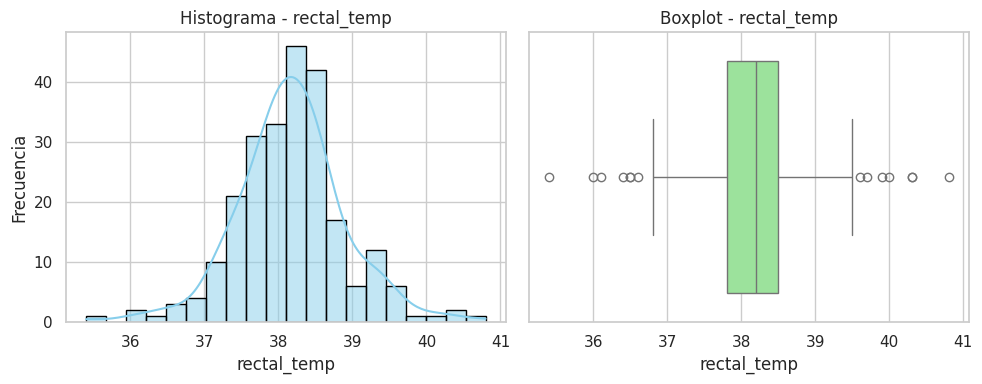

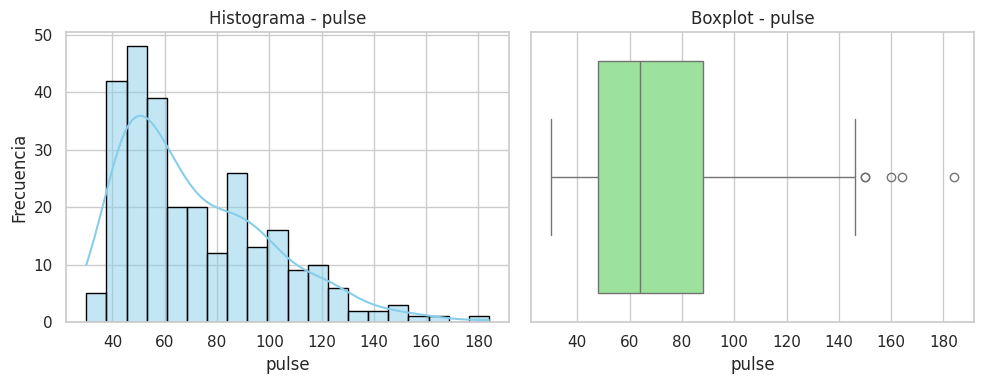

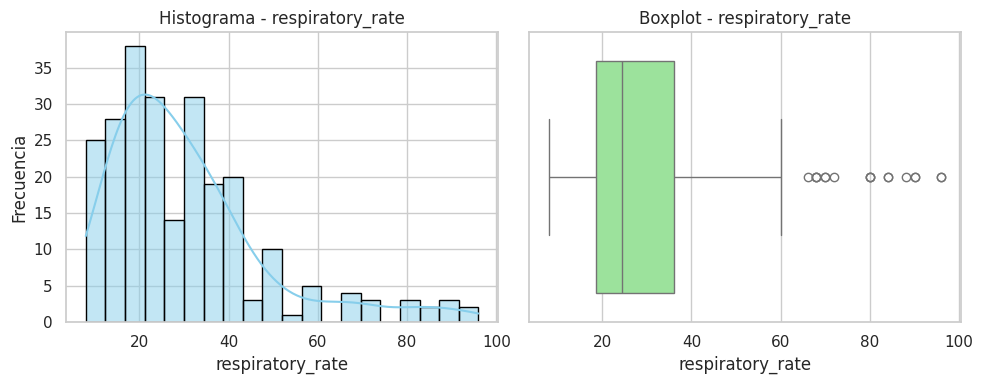

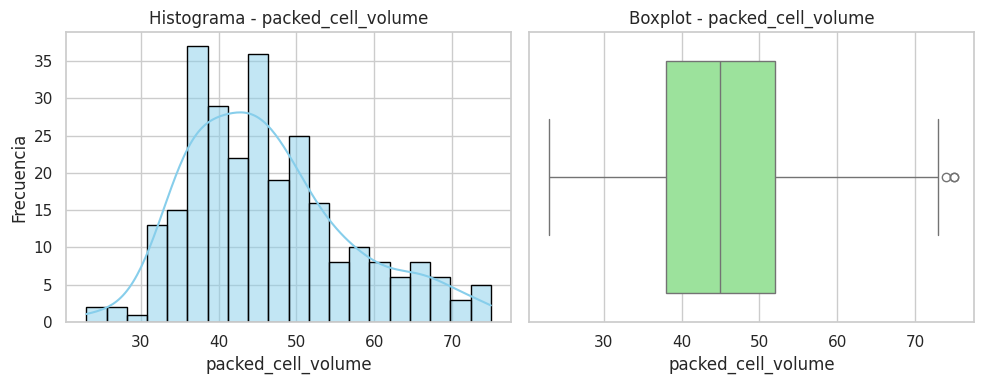

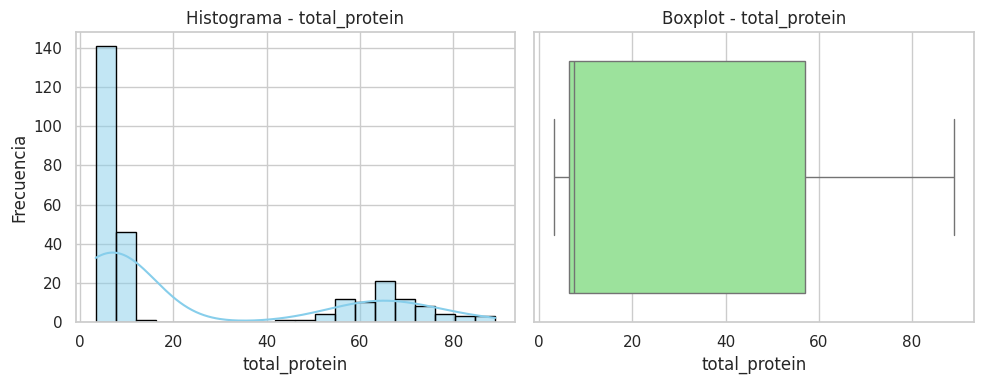

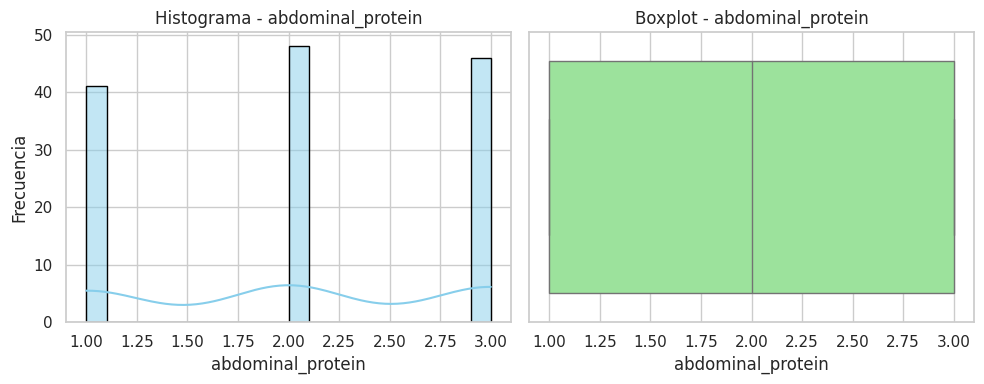

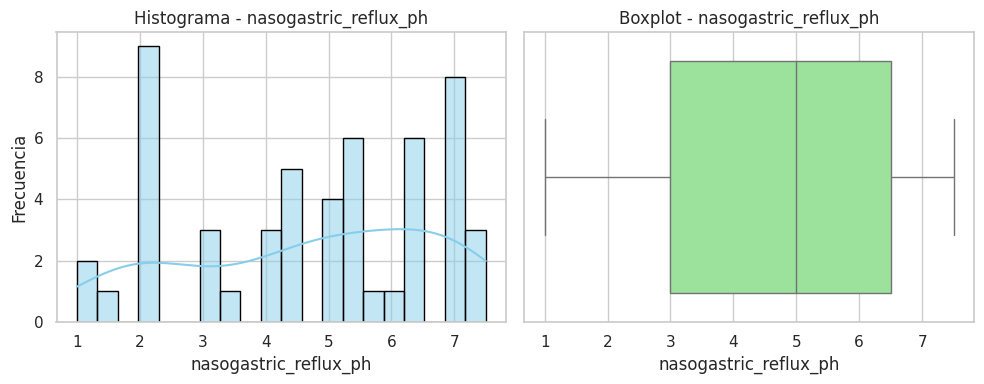

In [63]:


# --- Crear histogramas y boxplots con un for ---
for col in numerical_cols:
    plt.figure(figsize=(10, 4))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(train_data[col], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histograma - {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_data[col], color='lightgreen')
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


3️⃣ Relación entre variables y target

## Gráficos de dispersión (scatterplots) entre features y target

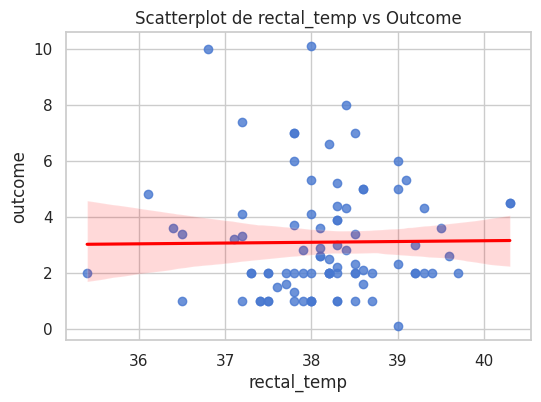

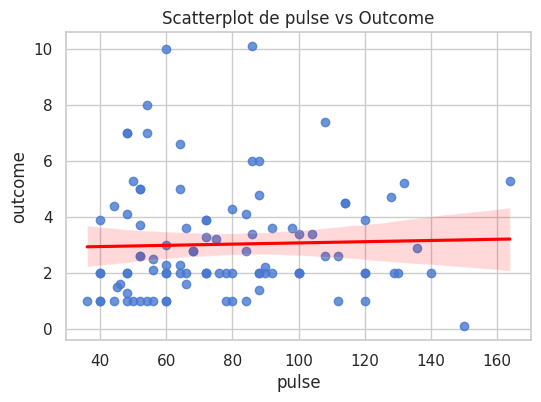

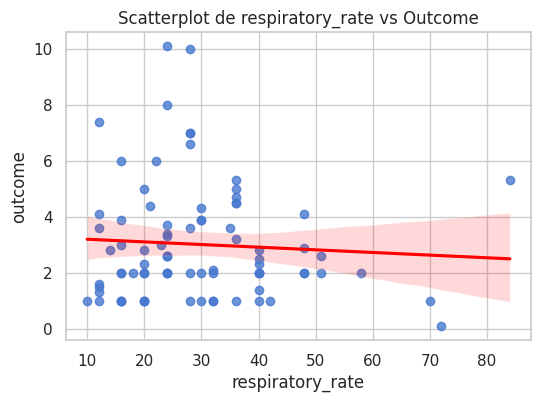

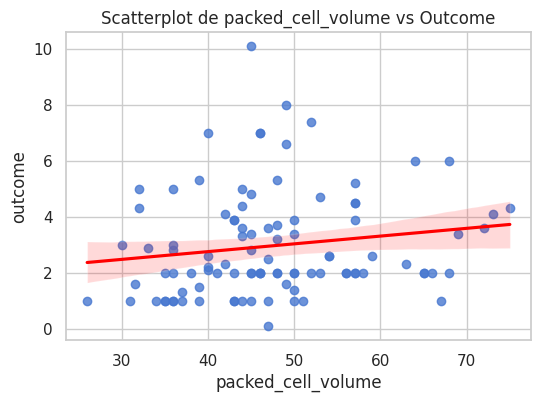

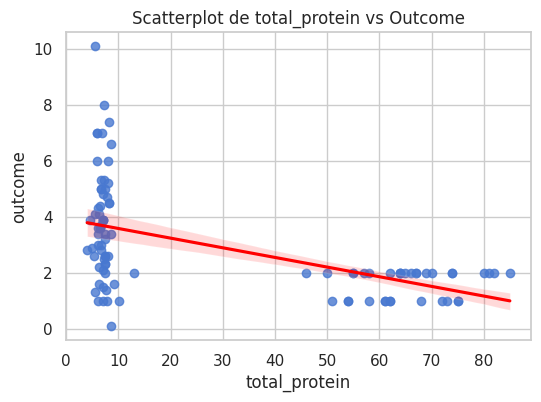

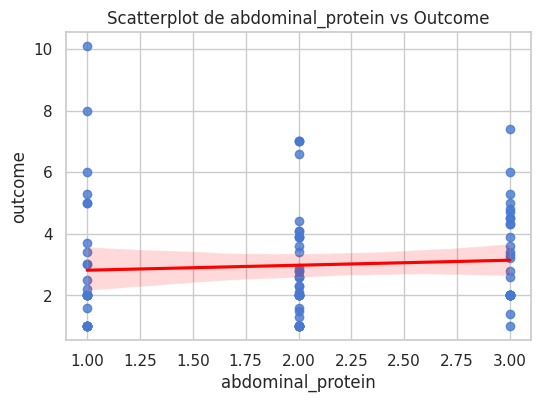

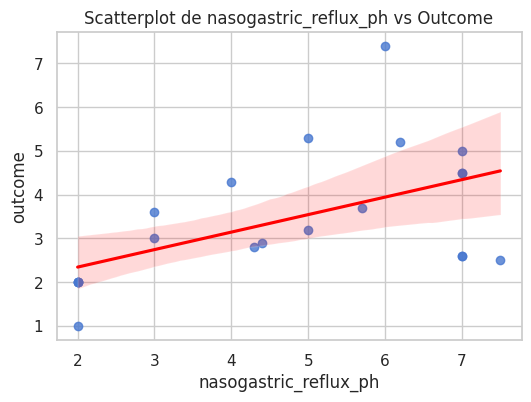

In [64]:

## target Outcome

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    ##sns.scatterplot(x=train_data[col], y=train_data['outcome'])
    sns.regplot(x=train_data[col], y=train_data['outcome'], line_kws={"color":"red"})


    plt.title(f"Scatterplot de {col} vs Outcome")
    plt.show()

#Interpretación :

* El diagrama de dispersión sugiere que la temperatura rectal por sí sola no es un factor pronóstico determinante del resultado del caballo afectado por cólico

* Existe una relación lineal débil. Un pulso más alto sugiere un peor pronóstico, pero la dispersión es

* Frecuencia Respiratoria: Relación confusa/insignificante debido a la alta dispersión

* Volumen de Células Empaquetadas: Existe una correlación lineal positiva más fuerte entre el PCV y el Outcome. A medida que el PCV aumenta, el valor promedio del Outcome también aumenta de manera significativa. Asumiendo que un Outcome más alto es un peor resultado, esto indica que los caballos más deshidratados o hemoconcentrados tienen un pronóstico consistentemente peor

* Proteína Total:La relación no es lineal simple. Los caballos con valores de proteína total muy altos o muy bajos son extremos y el rango intermedio normal es el que contiene la mayor incertidumbre pronóstica



## heatmap de correlación

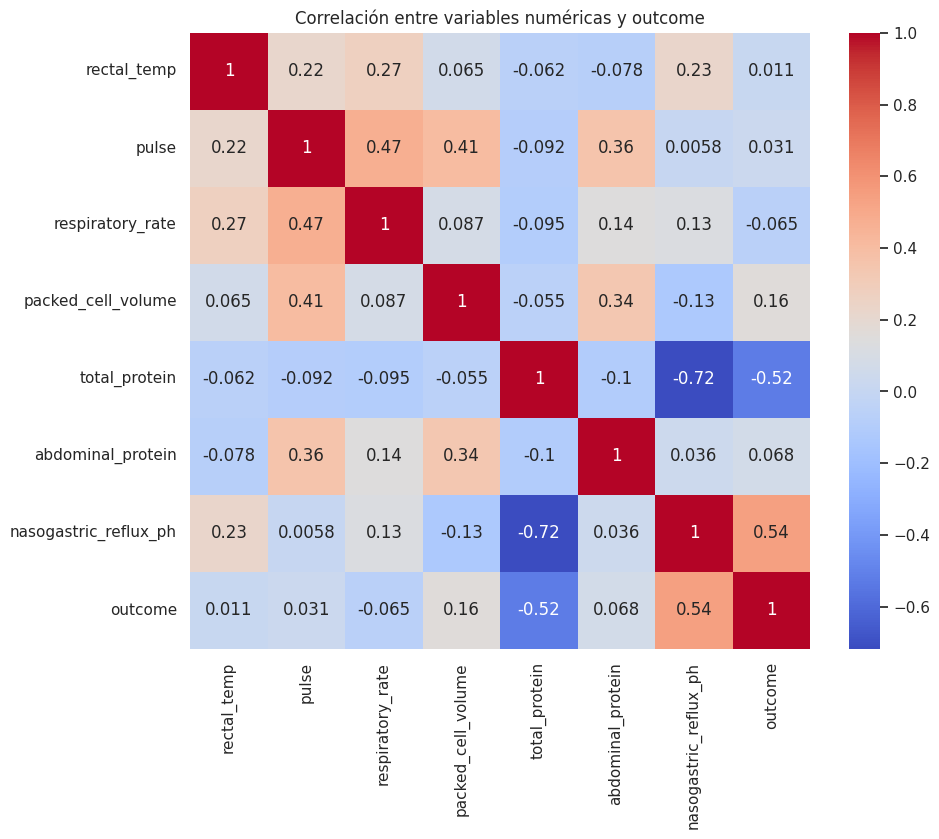

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data[numerical_cols + ['outcome']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlación entre variables numéricas y outcome")
plt.show()

#Observaciones posibles:

* pH del Reflujo Nasogástrico (nasogastric_reflux_ph): $\mathbf{r = +0.54}$
  * Correlación Positiva Fuerte: Esta es la relación lineal más clara y fuerte de todo el conjunto de datos. Un pH más alto (menos ácido, lo que a menudo indica reflujo desde áreas intestinales más posteriores o fermentación) se asocia fuertemente con un peor resultado (Outcome más alto).

* Proteína Total (total_protein): $\mathbf{r = -0.52}$
  * Existe una asociación negativa moderada a fuerte ($r=-0.52$) entre la proteína total y la gravedad del resultado, lo que indica que niveles más altos de proteína total se correlacionan con un resultado más favorable (Vivir).

In [66]:
###Análisis de balance de clases del target


📊 Distribución en Dataset de Entrenamiento:
         Frecuencia  Porcentaje (%)
outcome                            
0.1               1        0.333333
1.0              17        5.666667
1.3               1        0.333333
1.4               1        0.333333
1.5               1        0.333333
1.6               2        0.666667
2.0              26        8.666667
2.1               1        0.333333
2.2               1        0.333333
2.3               2        0.666667
2.5               1        0.333333
2.6               4        1.333333
2.8               3        1.000000
2.9               1        0.333333
3.0               2        0.666667
3.2               1        0.333333
3.3               1        0.333333
3.4               3        1.000000
3.6               3        1.000000
3.7               1        0.333333
3.9               4        1.333333
4.1               2        0.666667
4.3               2        0.666667
4.4               1        0.333333
4.5               2

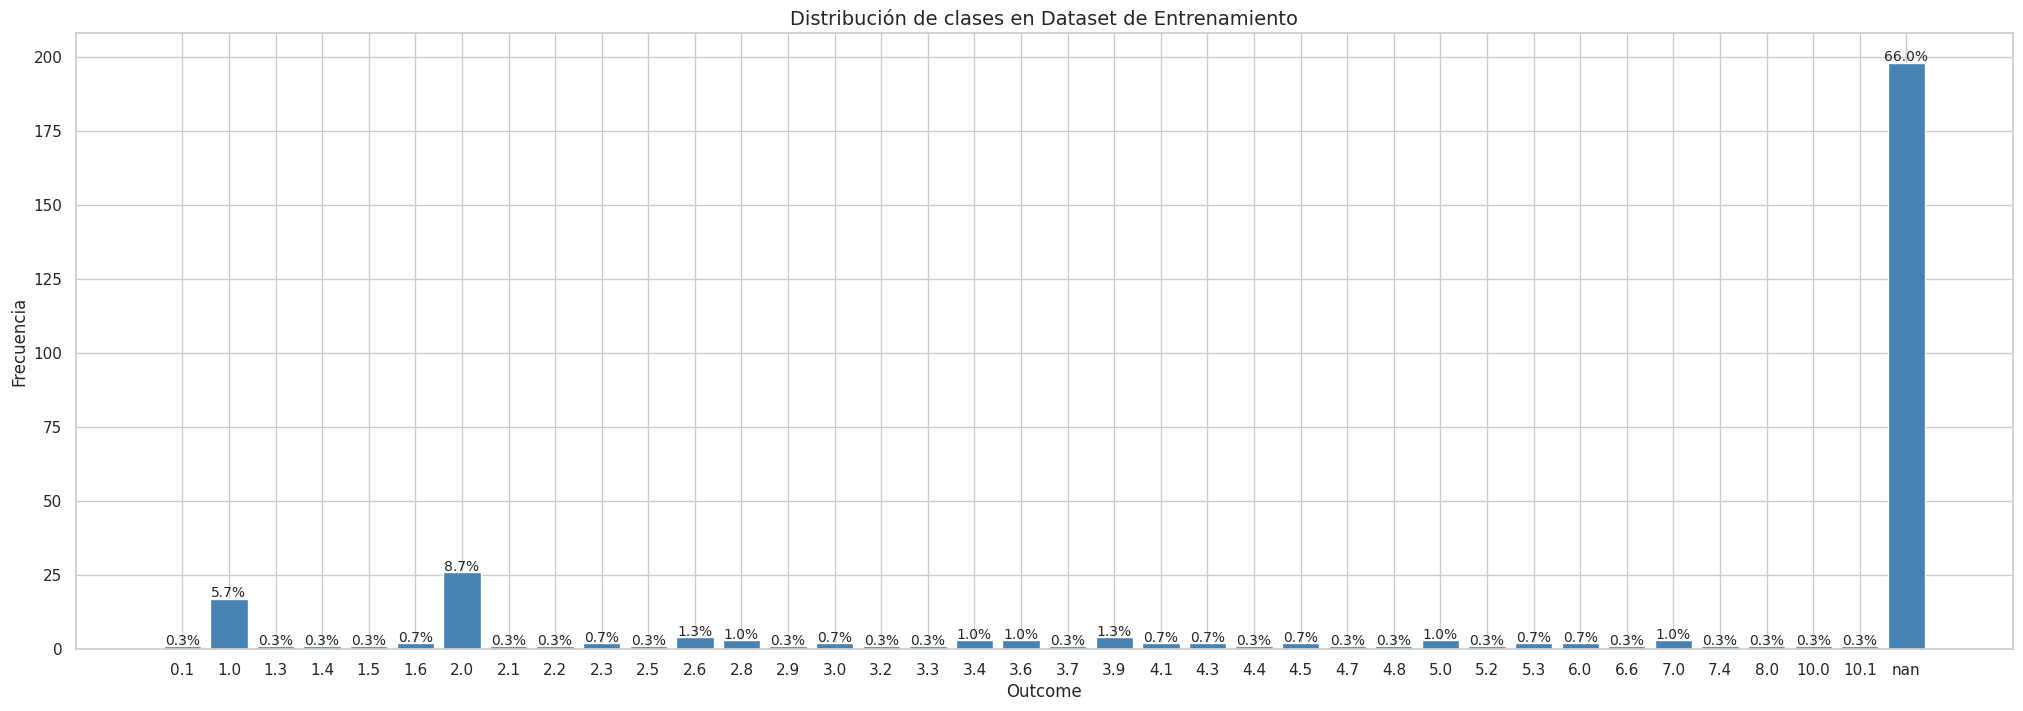

66.0
0.33333333333333337

🔎 Evaluación automática del balance en Dataset de Entrenamiento:
⚠️ El Dataset de Entrenamiento está **DESBALANCEADO** (diferencia 65.7%).

📊 Distribución en Dataset de Testeo:
         Frecuencia  Porcentaje (%)
outcome                            
0.9               1        1.470588
1.0               4        5.882353
1.1               2        2.941176
1.4               2        2.941176
1.8               1        1.470588
2.0               7       10.294118
2.1               1        1.470588
2.2               1        1.470588
2.5               1        1.470588
2.8               1        1.470588
3.1               2        2.941176
3.9               1        1.470588
4.3               1        1.470588
4.6               2        2.941176
5.0               1        1.470588
5.7               1        1.470588
6.5               1        1.470588
8.0               1        1.470588
NaN              37       54.411765


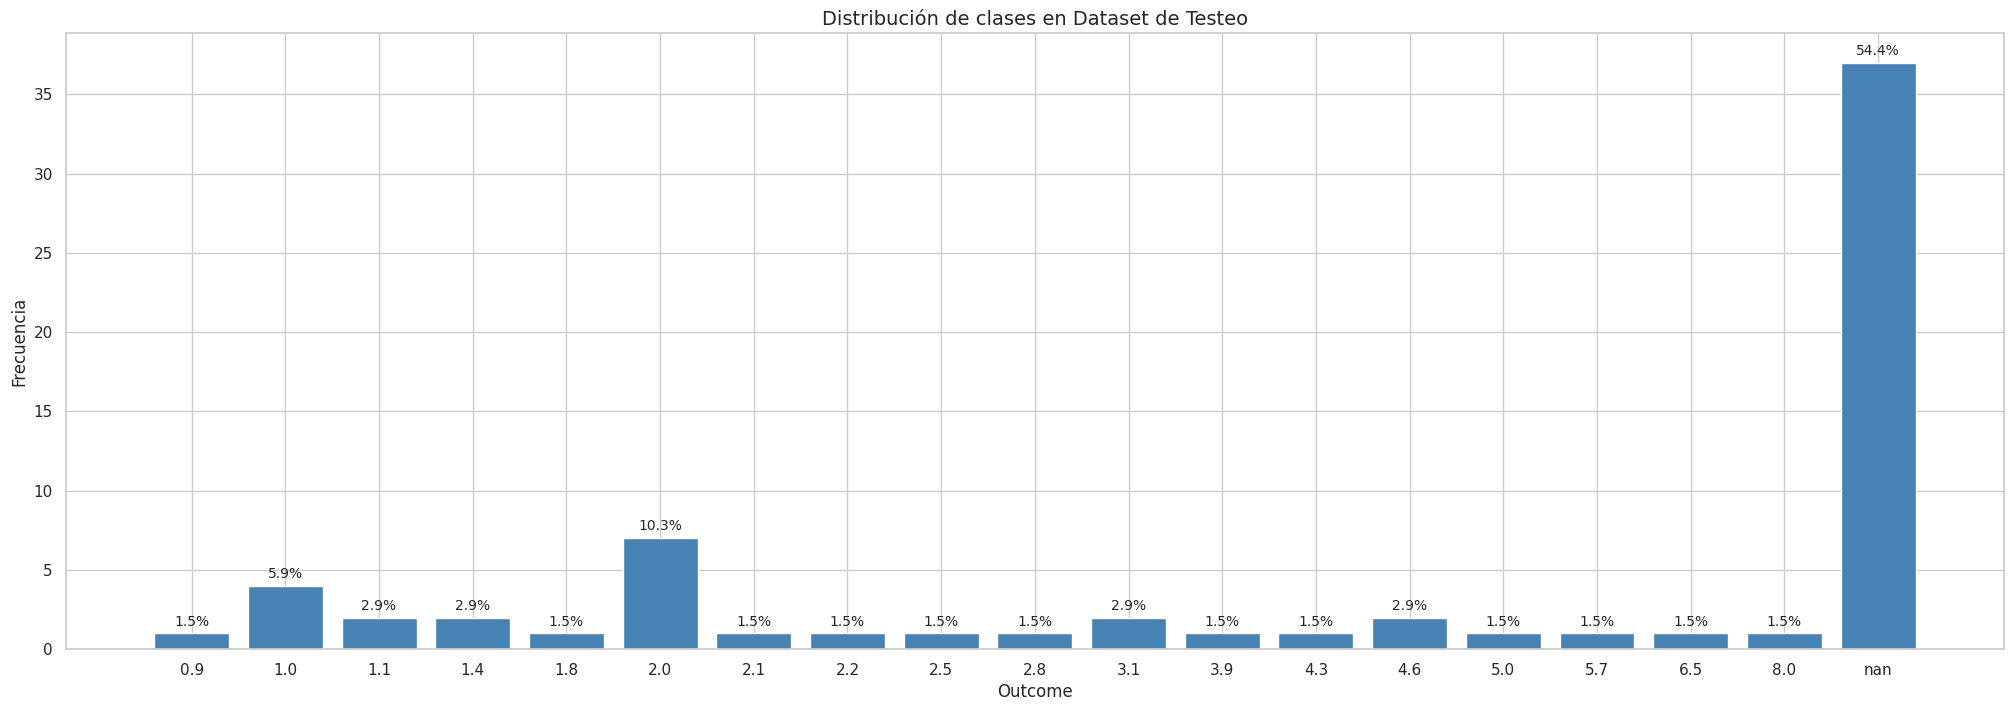

54.41176470588235
1.4705882352941175

🔎 Evaluación automática del balance en Dataset de Testeo:
⚠️ El Dataset de Testeo está **DESBALANCEADO** (diferencia 52.9%).


In [67]:
# Unir train y test para análisis conjunto


# Función para graficar distribución y diagnosticar balance
def graficar_balance(df, nombre_dataset):
    #La función:
    # Calcula la frecuencia y el porcentaje de cada valor en la columna 'outcome' de un DataFrame.
    # Muestra esos valores en una tabla y un gráfico de barras.
    # Evalúa automáticamente si las clases están balanceadas o desbalanceadas.

    # Calcular frecuencias y porcentajes
    freq = df['outcome'].value_counts(dropna=False).sort_index()
    percent = df['outcome'].value_counts(normalize=True, dropna=False).sort_index() * 100

    # Tabla resumen
    summary = pd.DataFrame({'Frecuencia': freq, 'Porcentaje (%)': percent})
    print(f"\n📊 Distribución en {nombre_dataset}:")
    print(summary)

    # Gráfico
    plt.figure(figsize=(25,8))
    bars = plt.bar(summary.index.astype(str), summary['Frecuencia'], color='steelblue')
    plt.title(f'Distribución de clases en {nombre_dataset}', fontsize=14)
    plt.xlabel('Outcome')
    plt.ylabel('Frecuencia')

    # Etiquetas con porcentaje sobre cada barra
    for bar, pct in zip(bars, summary['Porcentaje (%)']):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{pct:.1f}%', ha='center', fontsize=10)

    plt.show()

    # Diagnóstico automático de balance
    max_prop = percent.max()
    min_prop = percent.min()
    diff = abs(max_prop - min_prop)

    print(f"\n🔎 Evaluación automática del balance en {nombre_dataset}:")
    if max_prop > 70 or min_prop < 30:
        print(f"⚠️ El {nombre_dataset} está **DESBALANCEADO** (diferencia {diff:.1f}%).")
    else:
        print(f"✅ El {nombre_dataset} está **BALANCEADO** (diferencia {diff:.1f}%).")

# --- Aplicación a los datasets ---
graficar_balance(train_data, "Dataset de Entrenamiento")
graficar_balance(test_data, "Dataset de Testeo")



##Interpretacion
**Implicaciones para el modelado:**
## El dataset de entrenamiento presenta un problema de desbalance de clases extremo.
  - 📉 Desbalance Dominante
La clase mayoritaria es nan (probablemente valores no definidos/faltantes), que concentra el 66.0% de todos los datos.
 - 🤏 Clases Minoritarias
Las clases restantes (los valores de 0.1 a 10.1) son minoritarias, siendo 2.0 (8.7%) y 1.0 (5.7%) las únicas otras clases con una representación notable. La gran mayoría de los otros valores tienen una frecuencia extremadamente baja (0.3% a 1.0%).

##  El dataset de testeo presenta un desbalance de clases significativo, aunque ligeramente menos severo

- Clase Dominante (Mayoritaria): nan
  - La clase nan sigue siendo la más representada, con 54.6% del total de ejemplos. Esto es aproximadamente la mitad de los datos de prueba.

  - Nota: Es importante que el conjunto de prueba refleje el conjunto de entrenamiento, y en este caso, ambos están dominados por la clase nan.
- Clases Secundarias
  Las clases 2.0 (con 10.3%) y 1.0 (con 5.9%) son las siguientes más frecuentes.

- Clases Extremadamente Minoritarias
    - El resto de las clases tienen una frecuencia muy baja, oscilando en su mayoría entre 1.5% y 2.9%.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

## Resolución:

In [68]:

# =============================
#  Características del dataset
# =============================
print("== Dataset entrenamiento ==")
print("Número de filas:", train_data.shape[0])
print("Número de columnas:", train_data.shape[1])
print("\nTipos de variables:")
print(train_data.dtypes.value_counts())
print("\nNúmero de valores faltantes por columna:")
print(train_data.isna().sum())

# ============================================================
#  LIMPIEZA DE DATOS
# ============================================================

# Eliminar filas con target faltante
train_data.dropna(subset=['outcome'], inplace=True)
test_data.dropna(subset=['outcome'], inplace=True)
# Al ejecutar estas líneas, se eliminan todas esas filas que el gráfico identificaba como nan en la variable outcome, dejando solo las filas con un resultado válido para entrenar y evaluar el modelo.


# Transformar target a clasificación binaria (1 = vivo, 0 = muerto/eutanasiado)
train_data['outcome_binary'] = train_data['outcome'].apply(lambda x: 1 if x == 1 else 0)
test_data['outcome_binary'] = test_data['outcome'].apply(lambda x: 1 if x == 1 else 0)
#El código crea una nueva columna llamada outcome_binary en ambos datasets (train_data y test_data) basándose en los valores de la columna original outcome (la cual ya no contiene nan tras el paso anterior).

# Eliminar columnas irrelevantes o con muchos missing
cols_to_drop = ['hospital_number', 'cp_data', 'lesion_1', 'lesion_2', 'lesion_3',
                'lesion_4', 'lesion_5', 'lesion_6', 'lesion_7', 'lesion_8', 'outcome']
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)

#hospital_number y cp_data no aportan información clínica.
# Las columnas lesion_1 a lesion_8 tienen muchos missing o no son necesarias para predicción inmediata.
# outcome se reemplaza por outcome_binary

# ============================================================
#  VARIABLES CATEGÓRICAS Y NUMÉRICAS
# ============================================================

cat_features = ['surgery', 'age', 'temperature_of_extremities', 'peripheral_pulse',
                'mucous_membranes', 'capillary_refill_time', 'pain', 'peristalsis',
                'abdominal_distension', 'nasogastric_tube', 'nasogastric_reflux',
                'rectal_examination_feces', 'abdomen', 'surgical_lesion']

num_features = [col for col in train_data.columns if col not in cat_features + ['outcome_binary']]

print("\nVariables numéricas:", num_features)
print("Variables categóricas:", cat_features)

# ============================================================
#  DETECCIÓN Y ELIMINACIÓN DE OUTLIERS
# ============================================================

def detect_outliers_iqr(df, features):
    outlier_indices = set()
    for col in features:
        if df[col].dtype != 'O':
            col_data = df[col].dropna()
            Q1 = col_data.quantile(0.25)
            Q3 = col_data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outlier_indices.update(outliers_col)
            print(f"Outliers en '{col}': {len(outliers_col)}")
    print(f"Total filas con outliers en alguna variable numérica: {len(outlier_indices)}")
    return list(outlier_indices)

outliers_idx = detect_outliers_iqr(train_data, num_features)
train_data_clean = train_data.drop(index=outliers_idx)
train_data = train_data_clean.copy()
print("Filas después de eliminar outliers:", train_data.shape[0])
# El código realiza la detección y eliminación de valores atípicos (outliers) en las columnas numéricas del conjunto de datos de entrenamiento (train_data) utilizando el método del Rango Intercuartílico (IQR).

# ============================================================
# PIPELINE DE PREPROCESAMIENTO
# ============================================================

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), #Imputación con media (SimpleImputer(strategy='mean'))
    ('scaler', StandardScaler())
])
#El num_transformer limpia los datos numéricos rellenando los faltantes y luego los escala para que estén en la misma proporción, dejándolos listos para ser consumidos por el algoritmo de Machine Learning


cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #Imputación con moda (SimpleImputer(strategy='most_frequent'))
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
#El cat_transformer limpia los datos categóricos rellenando los faltantes con la moda, y luego los convierte a un formato numérico binario utilizable para el entrenamiento del modelo.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)
# El ColumnTransformer (preprocesador) actúa como un coordinador que aplica diferentes transformaciones a diferentes subconjuntos de columnas de tu dataset en paralelo.
# A las columnas numéricas (num_features), aplica el num_transformer (imputación por media + estandarización).
# A las columnas categóricas (cat_features), aplica el cat_transformer (imputación por moda + Codificación One-Hot).



# ============================================================
# SEPARACIÓN DE FEATURES Y TARGET
# ============================================================

X_train = train_data.drop(columns=['outcome_binary'])
y_train = train_data['outcome_binary']
X_test = test_data.drop(columns=['outcome_binary'])
y_test = test_data['outcome_binary']

# ============================================================
#  APLICAR PREPROCESAMIENTO
# ============================================================

X_train_processed = preprocessor.fit_transform(X_train)
#fit_transform(X_train): El preprocesador aprende los parámetros (medias, modas, categorías) del conjunto de entrenamiento (X_train) y luego aplica esas transformaciones a ese mismo conjunto.
X_test_processed = preprocessor.transform(X_test)
#transform(X_test): El preprocesador aplica los mismos parámetros aprendidos de X_train al conjunto de prueba (X_test), asegurando que no haya filtrado de información (data leakage).

# ============================================================
#  DIVISIÓN TRAIN / VALIDACIÓN / TEST
# ============================================================

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_processed, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("\nTamaño final de entrenamiento:", X_train_final.shape)
print("Tamaño de validación:", X_val.shape)
print("Tamaño de testeo:", X_test_processed.shape)






# ============================================================
#   BALANCEO DE CLASES CON SMOTE
# ============================================================

print("\nDistribución de clases antes del balanceo:")
print(y_train_final.value_counts(normalize=True) * 100)

# Aplicar SMOTE sólo si hay desbalance fuerte
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train_final)
# smote.fit_resample(X_train_final, y_train_final) toma el conjunto de entrenamiento (X_train_final y y_train_final) y lo transforma.
# SMOTE: Su función principal es crear nuevas instancias sintéticas de la clase minoritaria para igualar la proporción de clases con la clase mayoritaria.

#Los nuevos conjuntos X_train_bal y y_train_bal tienen una proporción de clases equilibrada (generalmente 50/50), eliminando el problema del desbalance de clases para el entrenamiento del modelo.

print("\nDistribución de clases después del balanceo:")
print(y_train_bal.value_counts(normalize=True) * 100)



# ============================================================
# RESUMEN GENERAL
# ============================================================

print("\n=== RESUMEN DEL PREPROCESAMIENTO ===")
print(f"Número de features numéricas: {len(num_features)}")
print(f"Número de features categóricas: {len(cat_features)}")
print("Manejo de missing values: media (numéricas) / moda (categóricas)")
print("Outliers eliminados con IQR")
print("Variables categóricas codificadas con OneHotEncoder")
print("Variables numéricas estandarizadas con StandardScaler")
print("Clasificación binaria: 1 = vivo, 0 = muerto o eutanasiado")
print("División: 80% train / 20% val / test separado")



== Dataset entrenamiento ==
Número de filas: 300
Número de columnas: 32

Tipos de variables:
float64    25
int64       7
Name: count, dtype: int64

Número de valores faltantes por columna:
surgery                         1
age                             0
hospital_number                 0
rectal_temp                    60
pulse                          24
respiratory_rate               58
temperature_of_extremities     56
peripheral_pulse               69
mucous_membranes               47
capillary_refill_time          32
pain                           55
peristalsis                    44
abdominal_distension           56
nasogastric_tube              104
nasogastric_reflux            106
nasogastric_reflux_ph         247
rectal_examination_feces      102
abdomen                       118
packed_cell_volume             29
total_protein                  33
abdominal_protein             165
outcome                       198
surgical_lesion                 1
lesion_1                     

## Descarte de Features
- Se descartaron las siguientes columnas:
   - Feature Descartada Justificación hospital_number Identificador único/Irrelevante. No aporta información predictiva sobre el pronóstico médico del paciente.
   - cp_data Datos redundantes o inútiles. Se asume que no es relevante para el pronóstico y posiblemente no contenga valores informativos.
   - lesion_1 a lesion_8
     - Alta cardinalidad o demasiados missing/. Representan la ubicación de lesiones, que puede ser compleja de codificar. Se asume que otras variables ya capturan la severidad/localización de las lesiones.-
   - outcome Original/Redundante. Se elimina después de haber sido transformado en la variable objetivo binaria outcome_binary.




## 4. **Clasificación con logistic regression**  
   

En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.

### 4.1 Entrenamiento y evaluación

=== Evaluación en conjunto de entrenamiento ===
Accuracy: 0.7222222222222222
ROC-AUC: 0.8222222222222223

Matriz de confusión:
[[12  3]
 [ 2  1]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.25      0.33      0.29         3

    accuracy                           0.72        18
   macro avg       0.55      0.57      0.56        18
weighted avg       0.76      0.72      0.74        18



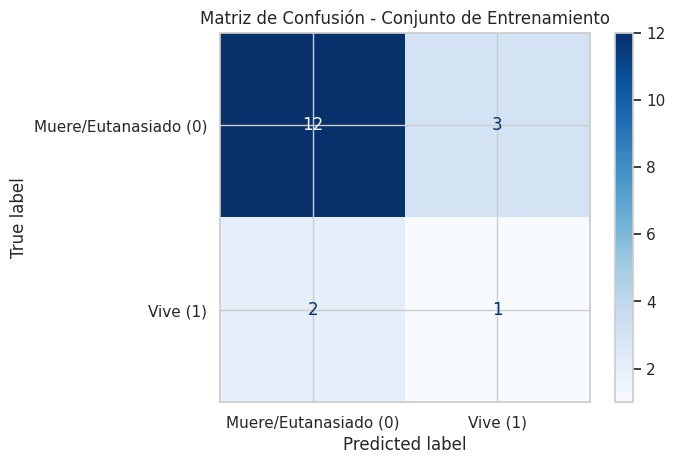

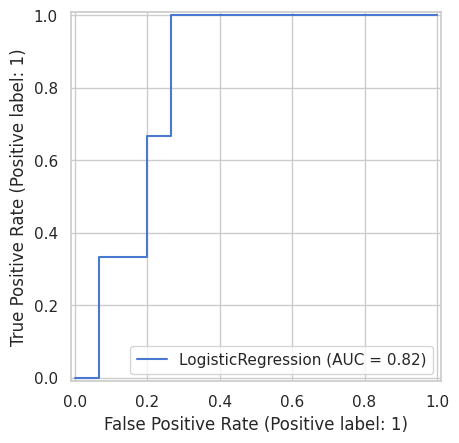

=== Evaluación en conjunto de test ===
Accuracy: 0.7096774193548387
ROC-AUC: 0.7685185185185185

Matriz de confusión:
[[19  8]
 [ 1  3]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.70      0.81        27
           1       0.27      0.75      0.40         4

    accuracy                           0.71        31
   macro avg       0.61      0.73      0.60        31
weighted avg       0.86      0.71      0.76        31



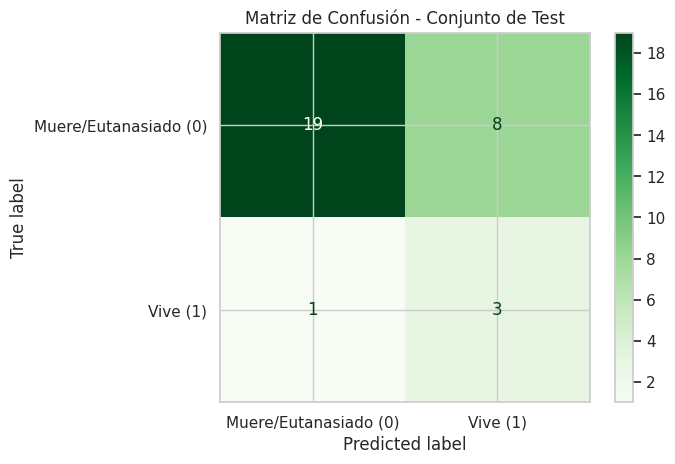


Modelo de Regresión Logística entrenado con éxito sobre datos balanceados con SMOTE


In [69]:
# ================================
# REGRESIÓN LOGÍSTICA
# ================================



# ================================
# 1. Definir el modelo
# ================================
logreg = LogisticRegression(random_state=42, max_iter=1000)
# Se crea una instancia del modelo de Regresión Logística.
# - random_state=42 asegura reproducibilidad.
# - max_iter=1000 aumenta el número de iteraciones máximas del optimizador
#   para garantizar convergencia, especialmente tras el OneHotEncoding (muchas columnas).

# ================================
# 2. Entrenar el modelo
# ================================
logreg.fit(X_train_bal, y_train_bal)
# Se entrena el modelo utilizando los datos balanceados por SMOTE.
# Esto permite que la regresión logística aprenda de forma equilibrada
# sin sesgarse hacia la clase mayoritaria.

# ================================
# 3. Predicciones
# ================================
# Se generan predicciones para los conjuntos de validación y test.
# - X_val se utiliza para evaluar rendimiento intermedio (ajustes de modelo).
# - X_test_processed se utiliza para la evaluación final.
y_val_pred = logreg.predict(X_val)
y_test_pred = logreg.predict(X_test_processed)

# ================================
# 4. Evaluación en Entrenamiento
# ================================
print("=== Evaluación en conjunto de entrenamiento ===")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
# Accuracy: proporción total de predicciones correctas.
print("ROC-AUC:", roc_auc_score(y_val, logreg.predict_proba(X_val)[:,1]))
# ROC-AUC: mide la capacidad del modelo para distinguir entre clases.
# Utiliza las probabilidades de pertenecer a la clase positiva
print("\nMatriz de confusión:")
print(confusion_matrix(y_val, y_val_pred))
# Matriz de confusión: muestra el número de verdaderos positivos, negativos, falsos positivos y negativos.
print("\nReporte de clasificación:")
print(classification_report(y_val, y_val_pred))
# Reporte de clasificación: muestra precisión, recall y F1-score por clase.


# Visualización de la matriz de confusión en validación
cm_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=['Muere/Eutanasiado (0)', 'Vive (1)'])
disp_val.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.show()

# Curva ROC: representa la relación entre Tasa de Verdaderos Positivos y Falsos Positivos.
# Cuanto más cerca esté la curva del vértice superior izquierdo, mejor el modelo.
RocCurveDisplay.from_estimator(logreg, X_val, y_val)
plt.title("Curva ROC - Validación")
plt.show()

# ================================
# 5. Evaluación en test
# ================================
print("=== Evaluación en conjunto de test ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test_processed)[:,1]))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_test_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Muere/Eutanasiado (0)', 'Vive (1)'])
disp_test.plot(cmap='Greens', values_format='d')
plt.title("Matriz de Confusión - Conjunto de Test")
plt.show()

# ================================
# 6. Resumen
# ================================
print("\nModelo de Regresión Logística entrenado con éxito sobre datos balanceados con SMOTE")

# Interpretacion Metricas Entrenameinto y Testeo

### Entrenamiento
1️⃣ Accuracy: Significa que aproximadamente el 72% de las predicciones fueron correctas en el conjunto de validación

2️⃣ ROC-AUC: Un ROC-AUC de 0.82 indica que, en general, el modelo puede diferenciar bastante bien entre vivos (1) y muertos/eutanasiados (0), aunque la clase minoritaria (1) tiene pocas muestras.

3️⃣ Matriz de confusión:
- Fila 0 (clase 0: muerto/eutanasiado): 12 correctamente predichos, 3 mal predichos como 1.
     -  De los 15 caballos muertos/eutanasiados, 12 fueron correctamente identificados, y 3 fueron clasificados erróneamente como vivos
- Fila 1 (clase 1: vivo): 1 correctamente predicho, 2 mal predichos como 0.
    -  De los 3 caballos que sobrevivieron, solo 1 fue identificado correctamente, mientras que 2 fueron clasificados como muertos.

4️⃣ Métricas por clase
- Clase 0:

  - Alta precisión (0.86) y buen recall (0.80) → el modelo predice bastante bien los muertos/eutanasiados.
  

- Clase 1:
  - Muy baja precisión (0.25) y recall (0.33) → el modelo falla en detectar vivos.
  
  - F1-score bajo (0.29) → combinación de precision y recall deficiente.

5️⃣ Interpretación general

- El modelo tiene buen desempeño en la clase mayoritaria, pero muy pobre en la clase minoritaria.

- Esto sugiere que, pese al uso de técnicas de balanceo (como SMOTE), la regresión logística aún tiende a favorecer la clase más frecuente.

- El ROC-AUC relativamente alto (0.82) sugiere que si ajustas el umbral de decisión, podrías mejorar la detección de la clase minoritaria.



### Test
1️⃣ Accuracy: El modelo clasifica correctamente el 71% de los casos del conjunto de test.
Esto representa un desempeño aceptable, aunque no sobresaliente.

2️⃣ ROC-AUC: El modelo tiene una capacidad moderada para distinguir entre vivos (1) y muertos/eutanasiados (0).
Un valor de 0.77 indica que el modelo discrimina razonablemente bien entre clases, aunque podría mejorar (valores >0.8 serían buenos, >0.9 excelentes).

3️⃣ Matriz de confusión:
- Clase 0: De los 27 caballos que murieron o fueron eutanasiados, 19 fueron correctamente identificados, mientras que 8 fueron erróneamente clasificados como vivos.

- Clase 1: De los 4 caballos que sobrevivieron, 3 fueron correctamente identificados, y solo 1 fue clasificado erróneamente como muerto.a respecto al conjunto de validación.

- Sin embargo, tiene muchos falsos positivos (predice “vivo” cuando en realidad es 0).

4️⃣ Métricas por clase
- Clase 0:

  - Alta precisión (0.95) y buen recall (0.70)
  - F1-score bajo (0.81)
  - La clase mayoritaria se predice correctamente la mayoría de las veces (alta precision), pero el modelo pierde algunos casos reales de 0 (recall 0.70).

- Clase 1:
  - Muy baja precisión (0.27) y buen recall (0.75)
  - F1-score bajo (0.40)  
  - El modelo captura 75% de los casos vivos reales (recall alto), pero muchas predicciones de 1 son incorrectas (precision baja). Esto indica muchos falsos positivos.

5️⃣ Interpretación general
- El modelo generaliza de manera similar al entrenamiento, con accuracy y ROC-AUC cercanos.

- Detecta bien los casos de la clase minoritaria (vivo) en términos de recall, pero muchos falsos positivos (baja precision).

- Esto indica que el modelo predice “vivo” con frecuencia para no perder casos reales, típico cuando se ajusta para recall de la clase minoritaria.





## 5- **Otro clasificador**

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

- Para entrenar un clasificador alternativo al de Regresión Logística, podemos elegir SVM (Support Vector Machine).

## Justificación de elección
- SVM es especialmente útil en problemas con:
  - Problemas de clasificación binaria.
- Manejo de desbalance:
  - SVM permite usar el parámetro class_weight='balanced' para compensar clases desbalanceadas, lo que ayuda a mejorar la detección de la clase minoritaria

- Robustez a variables correlacionadas:
  - Funciona bien incluso si algunas features están correlacionadas o si hay muchas variables tras la codificación one-hot




### 5.2 Entrenamiento del modelo.

=== Evaluación SVM en Entrenamiento ===
Accuracy: 0.8333333333333334
ROC-AUC: 0.9111111111111112

Matriz de confusión:
[[14  1]
 [ 2  1]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.50      0.33      0.40         3

    accuracy                           0.83        18
   macro avg       0.69      0.63      0.65        18
weighted avg       0.81      0.83      0.82        18



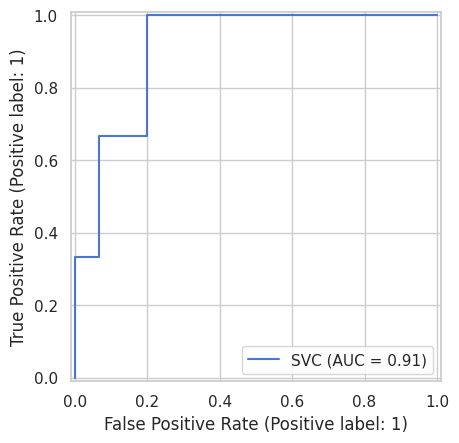

=== Evaluación SVM en test ===
Accuracy: 0.8709677419354839
ROC-AUC: 0.8518518518518519

Matriz de confusión:
[[24  3]
 [ 1  3]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.50      0.75      0.60         4

    accuracy                           0.87        31
   macro avg       0.73      0.82      0.76        31
weighted avg       0.90      0.87      0.88        31



In [70]:


# ================================
# 1. Definir el modelo SVM
# ================================
# Se utiliza un clasificador SVM con:
# - random_state=42 → para resultados reproducibles
# - probability=True → permite calcular probabilidades (necesarias para ROC-AUC)
# - class_weight='balanced' → ajusta el peso de cada clase según su frecuencia, útil si hay desbalance
svm_clf = SVC(random_state=42, probability=True, class_weight='balanced')  # class_weight='balanced' para clases desbalanceadas

# ================================
# 2. Entrenar el modelo
# ================================
# Entrenamos el modelo SVM con los datos balanceados obtenidos mediante SMOTE
svm_clf.fit(X_train_bal, y_train_bal)

# ================================
# 3. Predicciones
# ================================
# Se realizan predicciones tanto para validación como para test
y_val_pred_svm = svm_clf.predict(X_val)
y_test_pred_svm = svm_clf.predict(X_test_processed)

# ================================
# 4. Evaluación en Entrenamiento
# ================================
print("=== Evaluación SVM en Entrenamiento ===")
print("Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print("ROC-AUC:", roc_auc_score(y_val, svm_clf.predict_proba(X_val)[:,1]))
print("\nMatriz de confusión:")
print(confusion_matrix(y_val, y_val_pred_svm))
print("\nReporte de clasificación:")
print(classification_report(y_val, y_val_pred_svm))

# Curva ROC → visualiza la capacidad del modelo para discriminar entre clases
RocCurveDisplay.from_estimator(svm_clf, X_val, y_val)
plt.title("Curva ROC - SVM (Validación)")
plt.show()

# ================================
# 5. Evaluación en test
# ================================
print("=== Evaluación SVM en test ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, svm_clf.predict_proba(X_test_processed)[:,1]))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_test_pred_svm))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_test_pred_svm))

Explicación general del flujo:

1️⃣ Entrenamiento:

SVM busca el hiperplano óptimo que separe las dos clases (0 y 1) maximizando el margen entre ellas.

Usar class_weight='balanced' ayuda a compensar el efecto del desbalance original sin depender solo del SMOTE.


2️⃣ Ventajas del SVM en este contexto:

Suele rendir bien en datasets con pocas muestras y muchas variables, como horse-colic.

Es robusto ante ruido y no depende de supuestos lineales.



### 5.3 Evaluación del desempeño

#Evalucion de Desempeño


## Entrenamiento
1️⃣ Accuracy:
El modelo logra una exactitud del 83%, lo que significa que 8 de cada 10 predicciones fueron correctas en el conjunto de validación.
Esto representa una mejora notable respecto al modelo de Regresión Logística (≈72%), lo que sugiere que el SVM captura mejor las relaciones entre las variables y el resultado clínico.

2️⃣ ROC-AUC:
Con un ROC-AUC de 0.91, el modelo tiene una excelente capacidad de discriminación entre caballos vivos (1) y muertos/eutanasiados (0).
Este valor (>0.9) indica que el SVM distingue con gran precisión ambas clases, siendo claramente superior al desempeño del modelo logístico (ROC-AUC ≈ 0.82).

3️⃣ Matriz de confusión:

- Clase 0 (Muere/Eutanasiado):
De los 15 casos reales, 14 fueron correctamente identificados, y solo 1 fue clasificado erróneamente como vivo.
Esto refleja una muy alta sensibilidad hacia la clase mayoritaria.

- Clase 1 (Vive):
De los 3 caballos que sobrevivieron, el modelo acertó 1 y falló en 2, clasificándolos como muertos.
Esto muestra dificultad para reconocer la clase minoritaria, algo común cuando el número de muestras positivas es bajo.

4️⃣ Métricas por clase:

Clase 0:

- Alta precisión (0.88) → cuando el modelo predice “muere”, suele acertar.

- Excelente recall (0.93) → detecta casi todos los casos reales de muerte.

- F1-score alto (0.90) → muy buen equilibrio general.

Clase 1:

- Precisión moderada (0.50) → la mitad de las veces que predice “vivo” acierta.

- Recall bajo (0.33) → solo reconoce 1 de cada 3 casos vivos.

- F1-score bajo (0.40) → desempeño limitado por la escasez de ejemplos positivos

5️⃣ Interpretación general:
El modelo SVM muestra un rendimiento global sólido y una discriminación excelente (ROC-AUC = 0.91).
Sin embargo:

- Su rendimiento es asimétrico entre clases: detecta muy bien los caballos muertos/eutanasiados, pero falla en algunos sobrevivientes.

- Esto indica que el modelo prioriza la clase mayoritaria (0), aun cuando se usó class_weight='balanced'.



## Test
1️⃣ Accuracy:
El modelo logra una exactitud del 87%, lo que significa que casi 9 de cada 10 predicciones fueron correctas en datos no vistos.
Esto representa una mejora importante respecto al conjunto de validación (≈83%) y también frente al modelo de Regresión Logística (≈71%)

2️⃣ ROC-AUC:
Con un ROC-AUC de 0.85, el modelo mantiene una alta capacidad de discriminación entre caballos vivos (1) y muertos/eutanasiados (0).
Aunque levemente inferior al de validación (0.91), sigue siendo muy bueno (>0.8) y confirma que el modelo mantiene su poder predictivo fuera del conjunto de entrenamiento.

3️⃣ Matriz de confusión:
- Clase 0 (Muere/Eutanasiado):

  - De 27 caballos reales muertos, 24 fueron correctamente identificados, y solo 3 fueron clasificados erróneamente como vivos.

  - Esto muestra alta sensibilidad (recall 0.89) y excelente precisión (0.96) para la clase mayoritaria.

- Clase 1 (Vive):

  - De 4 caballos que sobrevivieron, 3 fueron correctamente identificados, y solo 1 fue clasificado erróneamente como muerto.

  - Esto implica un recall de 0.75, mucho mejor que en validación (0.33), y una precisión moderada (0.50).

4️⃣ Métricas por clase:

- Clase 0:

  - Muy alta precisión (0.96) → cuando predice “muere”, casi siempre acierta.

   - Buen recall (0.89) → detecta la mayoría de los casos reales.

   - F1-score muy alto (0.92) → excelente balance global.

- Clase 1:

  - Moderada precisión (0.50) → la mitad de las veces que predice “vivo” acierta.

   - Recall alto (0.75) → detecta correctamente 3 de los 4 caballos vivos.

   - F1-score (0.60) → desempeño equilibrado considerando la clase minoritaria.


5️⃣ Interpretación general:

El SVM muestra una mejora significativa respecto al modelo de Regresión Logística:

Accuracy pasa de 0.71 → 0.87

ROC-AUC pasa de 0.77 → 0.85

Mejora notable en recall de la clase 1 (vivos): de 0.75 en test (vs. 0.33 en validación y 0.75 en test de regresión logística).




## 6  Tuneo de hiperparámetros

En esta sección debe modificar probar cómo la modificación de un hiperparámetro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta sección.

In [71]:
# Valores de C a probar
C_values = [0.01, 0.1, 1, 10, 100]

# Diccionario para guardar resultados
results = {}

for C in C_values:
    print(f"\n=== SVM con C={C} ===")

    # Definir el modelo
    # - kernel='rbf': usa la función radial (no lineal)
    # - probability=True: permite calcular ROC-AUC
    # - random_state=42: para reproducibilidad
    svm_model = SVC(C=C, kernel='rbf', probability=True, random_state=42)

    #  Entrenar el modelo con los datos balanceados
    svm_model.fit(X_train_bal, y_train_bal)

    # Predicciones sobre el conjunto de validación
    y_val_pred = svm_model.predict(X_val)
    y_val_prob = svm_model.predict_proba(X_val)[:,1]  # Probabilidades para ROC-AUC

    # Métricas
    acc = accuracy_score(y_val, y_val_pred)
    roc = roc_auc_score(y_val, y_val_prob)

    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    print("Matriz de confusión:")
    print(confusion_matrix(y_val, y_val_pred))
    print("Reporte de clasificación:")
    print(classification_report(y_val, y_val_pred))

    # Guardar resultados
    results[C] = {'accuracy': acc, 'roc_auc': roc}


=== SVM con C=0.01 ===
Accuracy: 0.8889
ROC-AUC: 0.4667
Matriz de confusión:
[[14  1]
 [ 1  2]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.67      0.67      0.67         3

    accuracy                           0.89        18
   macro avg       0.80      0.80      0.80        18
weighted avg       0.89      0.89      0.89        18


=== SVM con C=0.1 ===
Accuracy: 0.8889
ROC-AUC: 0.8889
Matriz de confusión:
[[14  1]
 [ 1  2]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.67      0.67      0.67         3

    accuracy                           0.89        18
   macro avg       0.80      0.80      0.80        18
weighted avg       0.89      0.89      0.89        18


=== SVM con C=1 ===
Accuracy: 0.8333
ROC-AUC: 0.9111
Matriz de confusión:
[[14  1]
 [ 2  1]]
Reporte


##Justificación Hiperparametro

En el modelo Support Vector Machine (SVM), el hiperparámetro C es uno de los factores más importantes, ya que controla el equilibrio entre la maximización del margen y la penalización por errores de clasificación.

- Valores bajos de C (por ejemplo, 0.01 o 0.1) → implican una mayor regularización, lo que permite que el modelo tolere más errores de clasificación con el fin de mantener un margen más amplio entre las clases. Esto puede reducir el sobreajuste, aunque a costa de un posible subajuste (underfitting), ya que el modelo puede resultar demasiado simple.

- Valores altos de C (por ejemplo, 10 o 100) → reducen la regularización, haciendo que el modelo busque clasificar correctamente todos los ejemplos del entrenamiento, incluso si esto significa tener un margen más pequeño. Esto puede mejorar la exactitud en los datos de entrenamiento, pero conlleva un mayor riesgo de sobreajuste (overfitting).

El propósito del experimento es evaluar empíricamente cómo varía el desempeño del modelo al modificar C, analizando su impacto sobre las métricas de exactitud (Accuracy) y capacidad de discriminación (ROC-AUC).
El valor óptimo de C será aquel que logre el mejor compromiso entre sesgo y varianza, es decir, un modelo que generalice bien sin sobreajustarse a los datos de entrenamiento.


## 6- Conclusiones

Fundamente, justifique con sus palabras.

## Interpretación

El experimento evidencia que el hiperparámetro C tiene un impacto significativo en el desempeño del modelo SVM:

 - Con C = 0.01, el modelo presenta un subajuste (underfitting): aunque la accuracy general es relativamente alta (0.89), la métrica ROC-AUC (0.46) muestra una muy baja capacidad de discriminación entre clases, indicando que el modelo no logra separar adecuadamente los casos de “vivo” y “muerto/eutanasiado”.

 - Al incrementar C a 0.1, el modelo mejora sustancialmente su capacidad de discriminación (ROC-AUC ≈ 0.89) sin comprometer la exactitud. Este valor representa un buen equilibrio entre sesgo y varianza, con un desempeño más homogéneo entre ambas clases.

 - Para valores C ≥ 1, las métricas globales (accuracy y ROC-AUC) se mantienen elevadas (~0.9), pero se observa una disminución del recall y F1-score de la clase minoritaria (vivo). Esto sugiere que el modelo comienza a sobreajustarse (overfitting) a la clase mayoritaria, perdiendo capacidad de generalización.

En conclusión, el valor óptimo de C se encuentra alrededor de 0.1, ya que proporciona una buena capacidad de separación entre clases, mantiene la estabilidad en las métricas y evita tanto el subajuste como el sobreajuste.

# Referencias

Mencione los recursos utilizados

# BONUS 1

Si su dataset estaba relativamente balanceado, como bonus pruebe entrenar otro modelo clasificador diferente y comparar resultados con su clasificador elegido en 5) y el modelo elegido 6) luego del tuneo de hiperparámetros.



# BONUS 2

Si su dataset estaba desbalanceado, puebe utilizar alguna técnica para lidiar con el desbalance de clases durante el entrenamiento.

1) Ofrezca una comparativa de entrenar y evaluar modelos de Logistic regression con y sin class_weight='balanced' o el modelo SVC con y sin class_weight='balanced'

2) Pruebe entrenar KNN con y sin uso de SMOTE

( Ver apunte sobre Desbalance de clases de la cátedra )

